In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/rish/Desktop/Mini-Projects/ML Projects/Data/heartdiseasedataset.csv")
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


# EDA

In [3]:
# Function for finding the range of certain columns
def range(column):
    range = column.max() - column.min()

In [4]:
df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [5]:
df["Category"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 368 entries, 0 to 367
Series name: Category
Non-Null Count  Dtype 
--------------  ----- 
368 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [6]:
(df["Category"].values == "PAID").sum()

37

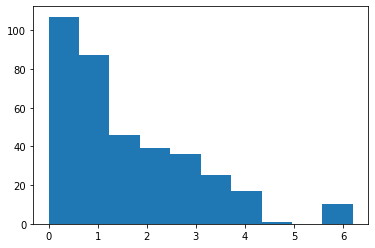

In [7]:
plt.hist(df["oldpeak"].values)
plt.show() # We see that the values are 

In [8]:
df["oldpeak"].skew()

1.0195527981602122

In [9]:
import scipy.stats as ss

In [10]:
ss.shapiro(df["oldpeak"]) # Nowhere near a normal ditribution as we can see from the p-value and the histogram

ShapiroResult(statistic=0.9006395936012268, pvalue=8.871375856145391e-15)

I am going to try and unskew the df["oldpeak"] column

We have the equation from this medium article https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55

        z = x - min(x) / max(x) - min(x)

This is called Min-Max Normalization

I am going to make my own function and then use sklearn's function

In [36]:
def MinMaxNormalization(x):
    """ Uses the equation 
    z = x - min(x) / max(x) - min(x) 
    and normalizes the data """

    z = ((x - x.min()) / (x.max() - x.min()))

    return z

In [30]:
x = df["oldpeak"].values

In [31]:
x

array([3. , 1.2, 3.4, 2. , 4. , 1.9, 0.2, 0. , 0. , 2.8, 0. , 2.6, 0. ,
       0. , 1. , 3.6, 6.2, 1.2, 1.9, 1.4, 4. , 1.8, 0. , 1. , 1. , 1.6,
       0. , 3.8, 1.2, 2. , 0. , 0. , 1.8, 2.5, 0.1, 0. , 0. , 2.8, 0. ,
       1.2, 3.6, 0.8, 1.8, 0. , 1. , 1. , 0. , 0.5, 2. , 0.8, 2.6, 0.6,
       0.9, 1.6, 4.2, 0. , 0. , 1. , 1. , 3.1, 2. , 2.2, 1.4, 2.8, 0. ,
       0. , 3.2, 1.2, 5.6, 0.8, 0.6, 1.2, 2.1, 1.6, 0.6, 0.4, 1. , 1.2,
       0.3, 0. , 3. , 1.2, 1.8, 3.2, 2.5, 2.2, 0.8, 0. , 3. , 0.1, 2. ,
       4.4, 3.4, 1.2, 0. , 0.2, 0. , 2.2, 0.8, 1. , 2.4, 1.4, 1.4, 2.8,
       3. , 2.8, 1.2, 3.6, 2.6, 3.6, 1.9, 0. , 1.8, 1.4, 1.4, 1.8, 4. ,
       0. , 1.8, 2.2, 2. , 0.6, 2.8, 1.4, 0. , 0.1, 1.5, 2.6, 0.2, 0.9,
       1. , 0.8, 1.6, 3.4, 2. , 2.6, 2.4, 2.9, 0. , 1.6, 0. , 3.8, 1.2,
       2. , 0. , 0. , 1.8, 2.5, 0.1, 0. , 0. , 2.8, 0. , 1.2, 0.9, 1.6,
       4.2, 0. , 0. , 1. , 1. , 3.1, 2. , 2.2, 1.4, 2.8, 0. , 0. , 3.2,
       1.2, 5.6, 0.8, 0.6, 1.2, 2.1, 2.6, 0. , 0. , 1. , 3.6, 6.

In [37]:
z = MinMaxNormalization(x)

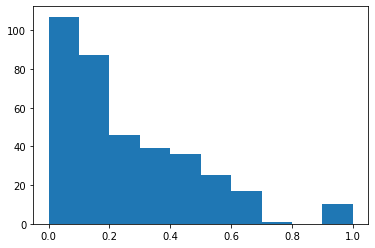

In [38]:
plt.hist(z)
plt.show() 

The equation worked and now I will use the sklean minmaxscaler function

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
x = df["oldpeak"].values

In [41]:
mms = MinMaxScaler()

x = mms.fit_transform(x)

ValueError: Expected 2D array, got 1D array instead:
array=[3.  1.2 3.4 2.  4.  1.9 0.2 0.  0.  2.8 0.  2.6 0.  0.  1.  3.6 6.2 1.2
 1.9 1.4 4.  1.8 0.  1.  1.  1.6 0.  3.8 1.2 2.  0.  0.  1.8 2.5 0.1 0.
 0.  2.8 0.  1.2 3.6 0.8 1.8 0.  1.  1.  0.  0.5 2.  0.8 2.6 0.6 0.9 1.6
 4.2 0.  0.  1.  1.  3.1 2.  2.2 1.4 2.8 0.  0.  3.2 1.2 5.6 0.8 0.6 1.2
 2.1 1.6 0.6 0.4 1.  1.2 0.3 0.  3.  1.2 1.8 3.2 2.5 2.2 0.8 0.  3.  0.1
 2.  4.4 3.4 1.2 0.  0.2 0.  2.2 0.8 1.  2.4 1.4 1.4 2.8 3.  2.8 1.2 3.6
 2.6 3.6 1.9 0.  1.8 1.4 1.4 1.8 4.  0.  1.8 2.2 2.  0.6 2.8 1.4 0.  0.1
 1.5 2.6 0.2 0.9 1.  0.8 1.6 3.4 2.  2.6 2.4 2.9 0.  1.6 0.  3.8 1.2 2.
 0.  0.  1.8 2.5 0.1 0.  0.  2.8 0.  1.2 0.9 1.6 4.2 0.  0.  1.  1.  3.1
 2.  2.2 1.4 2.8 0.  0.  3.2 1.2 5.6 0.8 0.6 1.2 2.1 2.6 0.  0.  1.  3.6
 6.2 1.2 1.9 1.4 4.  1.8 0.  1.  1.  1.6 0.  3.8 1.2 2.  0.  0.  1.8 2.5
 0.1 0.  0.  2.8 0.  1.2 3.6 0.8 1.8 0.  1.  1.  0.  0.5 2.  0.8 2.6 0.6
 1.2 0.9 1.6 4.2 0.  0.  1.  1.  3.1 2.  2.2 1.4 2.8 0.  0.  3.2 1.2 5.6
 0.8 0.6 1.2 2.1 2.6 0.  0.  1.  3.6 6.2 1.2 1.9 1.4 4.  1.8 0.  1.  1.
 1.6 0.  3.8 1.2 2.  0.  0.  1.8 2.5 0.1 0.  0.  2.8 0.  1.2 3.6 1.2 0.9
 1.6 4.2 0.  0.  1.  1.  3.1 2.  2.2 1.4 2.8 0.  0.  3.2 1.2 5.6 0.8 0.6
 1.2 2.1 2.6 0.  0.  1.  3.6 6.2 1.2 1.9 1.4 4.  1.8 0.  1.  1.  1.6 1.2
 0.9 1.6 4.2 0.  0.  1.  1.  3.1 2.  2.2 1.4 2.8 0.  0.  3.2 1.2 5.6 0.8
 0.6 1.2 2.1 2.6 0.  0.  1.  3.6 6.2 1.2 1.9 1.4 4.  1.8 0.  1.  1.  1.6
 0.  3.8 1.2 2.  0.  0.  1.8 2.5 0.1 0.  0.  2.8 0.  1.2 3.6 0.8 1.8 0.
 1.  1.  0.  0.5 2.  0.8 2.6 0.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.